In [41]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/
from __future__ import print_function
import os
import pandas as pd

In [42]:
!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  140k    0  140k    0     0   471k      0 --:--:-- --:--:-- --:--:--  471k


In [43]:
# move the downloaded data to PUI data
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ram844/PUIdata


In [44]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ram844/PUIdata


In [45]:
# move the data
!mv dhsdaily.csv $PUIDATA

In [46]:
#test if the data is there
!ls $PUIDATA

dhsdaily.csv


In [47]:
#read in the data with pandas
dhs = pd.read_csv("%s/dhsdaily.csv"%os.getenv("PUIDATA"))

In [48]:
#print the fist 8 lines out
dhs.head(8)

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,08/21/2013,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
1,08/22/2013,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2,08/23/2013,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
3,08/24/2013,28274,21343,49617,7110,2690,9800,10291,14650,21343,35993,1801,3824
4,08/25/2013,28458,21400,49858,7230,2704,9934,10324,14694,21400,36094,1804,3830
5,08/26/2013,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841
6,08/27/2013,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852
7,08/28/2013,28428,21325,49753,7229,2721,9950,10284,14647,21325,35972,1803,3831


In [49]:
#print the last 3 lines out
dhs.tail(3)

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
1813,09/16/2018,37933,22347,60280,11248,4374,15622,12651,17030,22347,39377,2481,5281
1814,09/17/2018,38030,22321,60351,11320,4401,15721,12635,16990,22321,39311,2500,5319
1815,09/18/2018,38083,22354,60437,11338,4400,15738,12658,17024,22354,39378,2502,5321


In [50]:
#look at the columns available, those are the variables
dhs.columns

Index([u'Date of Census', u'Total Adults in Shelter',
       u'Total Children in Shelter', u'Total Individuals in Shelter',
       u'Single Adult Men in Shelter', u'Single Adult Women in Shelter',
       u'Total Single Adults in Shelter', u'Families with Children in Shelter',
       u'Adults in Families with Children in Shelter',
       u'Children in Families with Children in Shelter',
       u'Total Individuals in Families with Children in Shelter ',
       u'Adult Families in Shelter',
       u'Individuals in Adult Families in Shelter'],
      dtype='object')

In [51]:
#count how many rows, those are the data points
dhs.size

23608

In [55]:
#select 2 columns only for plotting
dhs_2c = dhs[['Total Children in Shelter', 'Adult Families in Shelter']]

In [56]:
dhs_2c.head()

,Total Children in Shelter,Adult Families in Shelter
0,21314,1796
1,21324,1803
2,21291,1802
3,21343,1801
4,21400,1804


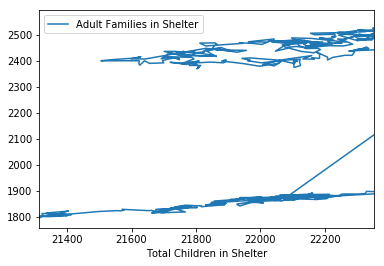

In [58]:
dhs_2c.plot(x="Total Children in Shelter", y="Adult Families in Shelter")

In [59]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


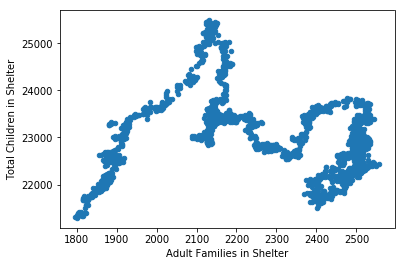

In [60]:
dhs_2c.plot(x="Adult Families in Shelter", y="Total Children in Shelter", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

In [61]:
##solution 2: solution 2: Use API and download a json file
url = "https://data.cityofnewyork.us/resource/wece-v9d7.json"

In [62]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [63]:
# print it out
df.head(3)

,adult_families_in_shelter,adults_in_families_with_children_in_shelter,children_in_families_with_children_in_shelter,date_of_census,families_with_children_in_shelter,individuals_in_adult_families_in_shelter,single_adult_men_in_shelter,single_adult_women_in_shelter,total_adults_in_shelter,total_children_in_shelter,total_individuals_in_families_with_children_in_shelter_,total_individuals_in_shelter,total_single_adults_in_shelter
0,1796,14607,21314,2013-08-21T00:00:00.000,10261,3811,7231,2710,28359,21314,35921,49673,9941
1,1803,14622,21324,2013-08-22T00:00:00.000,10274,3827,7201,2716,28366,21324,35946,49690,9917
2,1802,14611,21291,2013-08-23T00:00:00.000,10266,3826,7149,2671,28257,21291,35902,49548,9820


In [64]:
#now select a date and 2 variables
dhs_3c = df[['date_of_census', 'total_children_in_shelter', 'adult_families_in_shelter']]

In [66]:
dhs_3c.rename(columns = {'date_of_census':'Date of Census', 
               'total_children_in_shelter':'Total Children in Shelter', 
               'adult_families_in_shelter': 'Adult Families in Shelter'}, inplace=True)

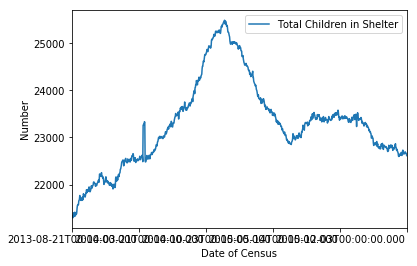

In [67]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Date of Census', y='Total Children in Shelter');
ax.set_ylabel("Number");

In [68]:
dhs_3c["Date of Census"] = dhs_3c["Date of Census"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


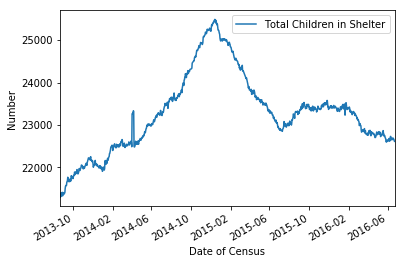

In [69]:
ax = dhs_3c.plot(x='Date of Census', y='Total Children in Shelter')
ax.set_ylabel("Number");

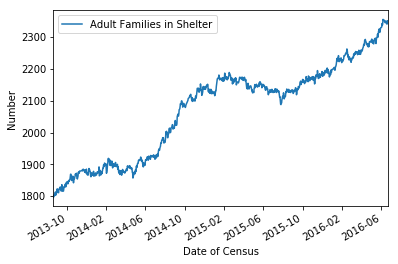

In [70]:
#plot the other columns
ax = dhs_3c.plot(x='Date of Census', y='Adult Families in Shelter')
ax.set_ylabel("Number");